## Name : Supam  Deep Singh
## Student ID: 186 800 720 

## Project: COVID-19 IN CANADA

##Description :
###With COVID-19 hitting the world, I wanted to see How it impacted Canada?
### What were the different regions of Canada that suffered the most and what were the regions that were impacted the least ?
### I also wanted to see What was the trend of Covid-19 over time? What were the particular months that had the most impact on different regions of Canada ?

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd


     |████████████████████████████████| 1.0MB 19.5MB/s 
     |████████████████████████████████| 14.8MB 237kB/s 
     |████████████████████████████████| 6.5MB 38.5MB/s 


Saving covid19.csv to covid19.csv
Saving gpr_000b11a_e.dbf to gpr_000b11a_e.dbf
Saving gpr_000b11a_e.prj to gpr_000b11a_e.prj
Saving gpr_000b11a_e.shp to gpr_000b11a_e.shp
Saving gpr_000b11a_e.shx to gpr_000b11a_e.shx


In [127]:
df = pd.read_csv('covid19.csv')
ontario_province_data = df[df["prname"] == "Ontario"]
quebec_province_data = df[df["prname"] == "Quebec"]
nova_scotia_province_data = df[df["prname"] == "Nova Scotia"]
new_brunswick_province_data = df[df["prname"] == "New Brunswick"]
manitoba_province_data = df[df["prname"] == "Manitoba"]
british_columbia_province_data = df[df["prname"] == "British Columbia"]
prince_edward_island_province_data = df[df["prname"] == "Prince Edward Island"]
saskatchewan_province_data = df[df["prname"] == "Saskatchewan"]
alberta_province_data = df[df["prname"] == "Alberta"]
newfoundland_and_labrador_province_data = df[df["prname"] == "Newfoundland and Labrador"]
 


In [126]:
from shapely.geometry import Point
# !pip install adjustText
from adjustText import adjust_text
# !pip install mapclassify
from matplotlib.transforms import Bbox


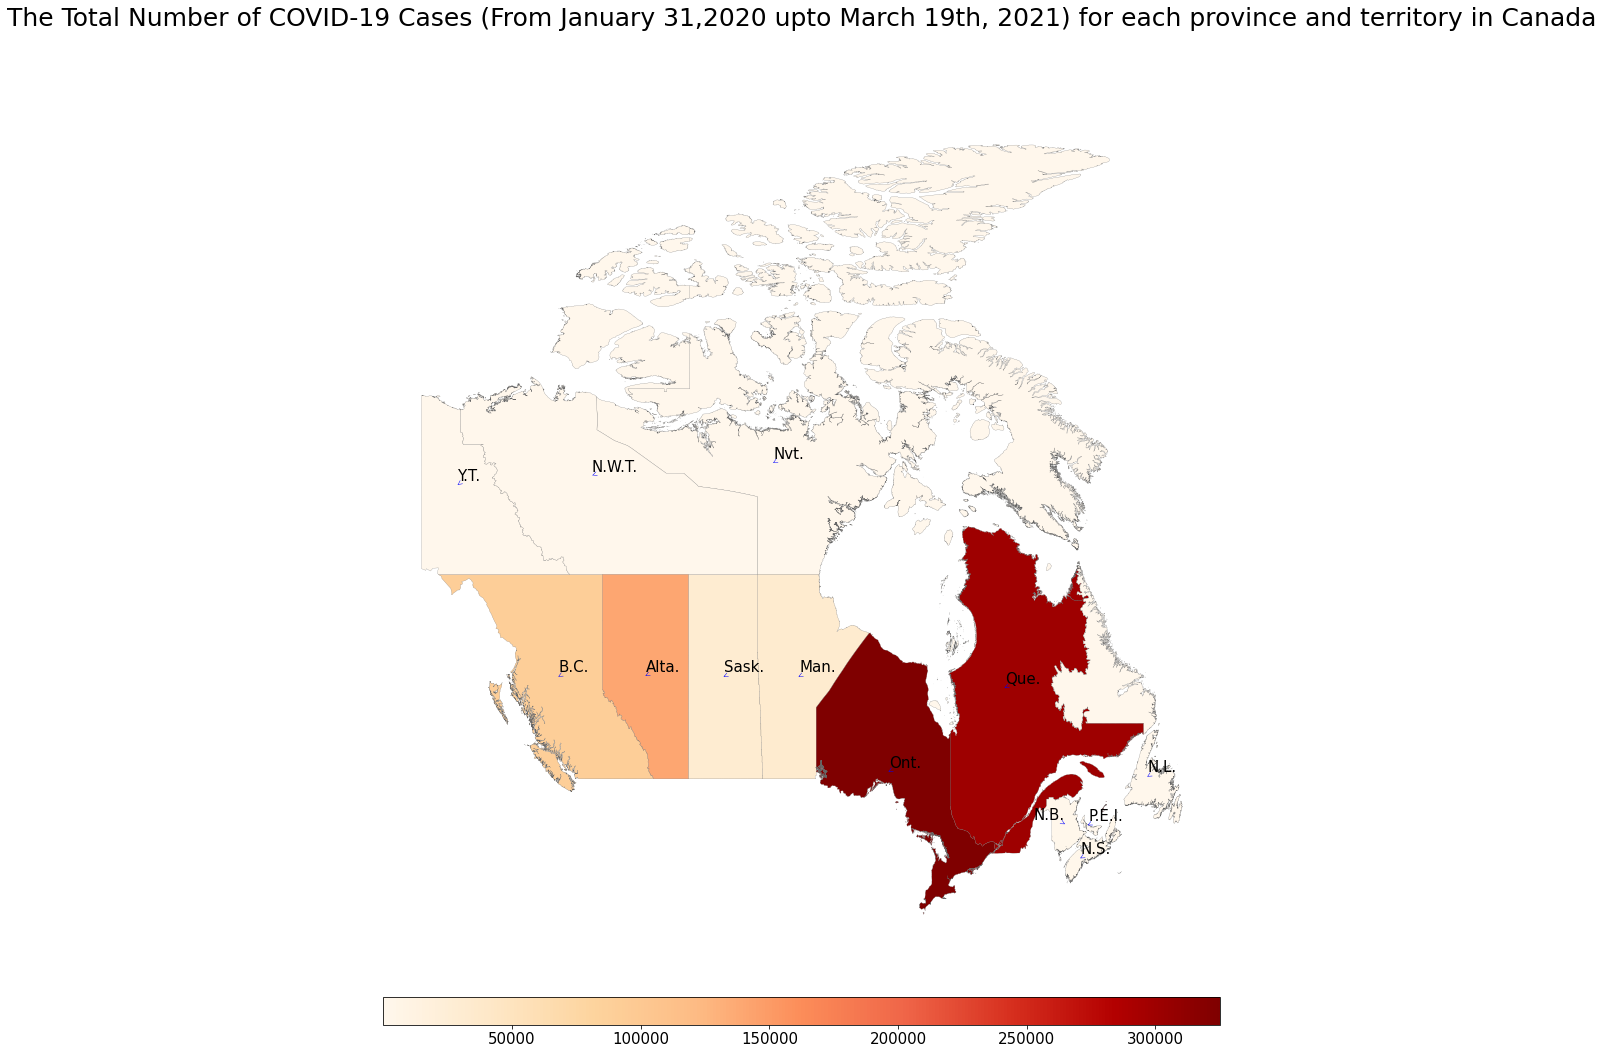

In [114]:
gf  = gpd.read_file("gpr_000b11a_e.zip")

data_march_2021 = df[df['date'].apply(lambda x:x.split()[0]) == "19-03-2021"]
data_march_2021
covid_canada_data = gf.merge(data_march_2021,how='left',left_on='PRENAME', right_on='prname')
covid_canada_data.head()

covid_canada_data["center"] = covid_canada_data["geometry"].representative_point()
covid_canada_data_points = covid_canada_data.copy()
covid_canada_data_points.set_geometry("center", inplace = True)




ax = covid_canada_data.plot(column ="numtotal",cmap="OrRd",figsize=(15,20),edgecolor='0.4',linewidth=0.2 )



ax.set_axis_off()
vmin = covid_canada_data.numtotal.min()
vmax = covid_canada_data.numtotal.max()
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


plt.title("The Total Number of COVID-19 Cases (From January 31,2020 upto March 19th, 2021) for each province and territory in Canada",color="black",fontsize=25,pad=80)
fmt = '%1.0f'
cbar = plt.colorbar(sm,orientation="horizontal", fraction=0.046, pad=0.04, aspect = 30,format = fmt)
cbar.ax.tick_params(labelsize=15)

texts = []

for x, y, label in zip(covid_canada_data_points.geometry.x, covid_canada_data_points.geometry.y, covid_canada_data_points["PREABBR"]):
    texts.append(plt.text(x, y, label, fontsize = 15,color="black"))




adjust_text(texts, arrowprops=dict(arrowstyle="->", color='blue', lw=0.5),
                                                save_steps=False)


plt.show()


### For the visualisation above I wanted to know, Which Region of Canada had the most number of Total COVID-19 cases from Jan 31, 2020 upto March 19, 2021 ? 

###The above visualisation shows the total number of Covid-19 cases in each province and territory in Canada from Jan 31, 2020 upto March 19, 2021. We can see that the maximum number of Covid-19 cases were in Ontario and Quebec around 300,000. From the  visualisation we can see that Alberta is the next most hit province after Ontario and Quebec with Covid-19 cases around 140,000. The zones that were least affected are Yukon(YT), North West Territories(N.W.T), Nunavut(Nvt), Prince Edward Island, Nova Scotia and Newfoundland and Labrador. 

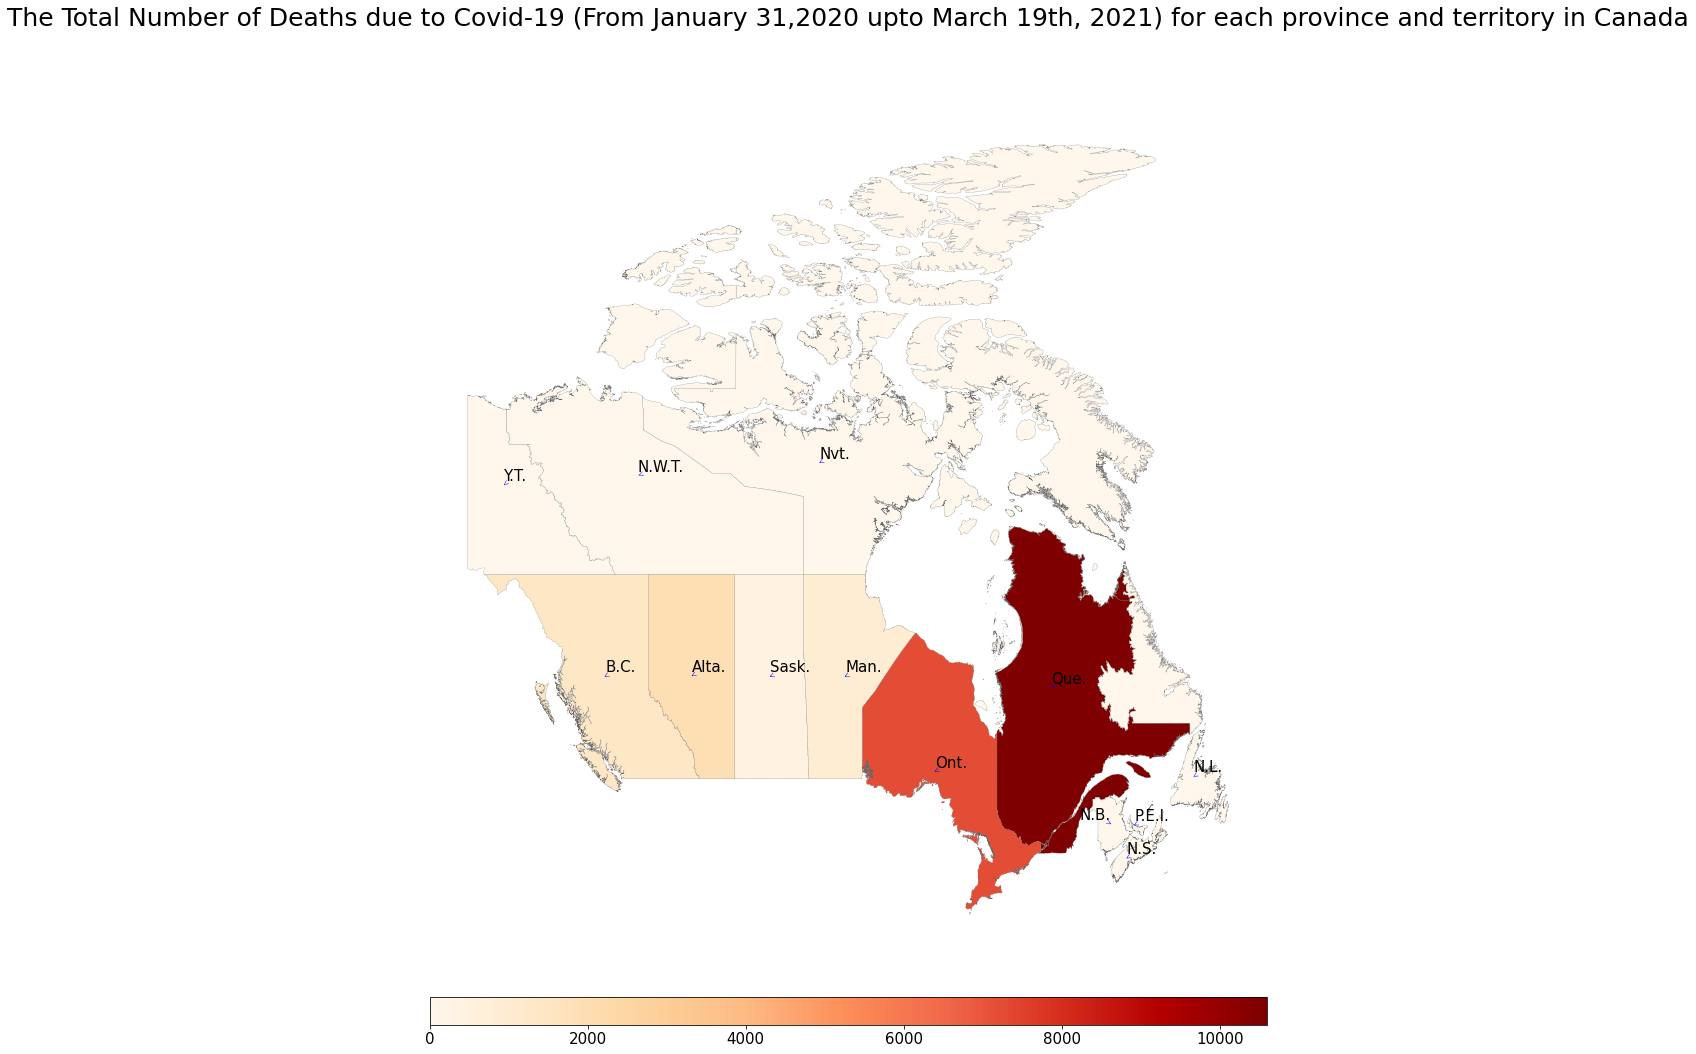

In [115]:
gf  = gpd.read_file("gpr_000b11a_e.zip")

data_march_2021 = df[df['date'].apply(lambda x:x.split()[0]) == "19-03-2021"]
data_march_2021
covid_canada_data = gf.merge(data_march_2021,how='left',left_on='PRENAME', right_on='prname')
covid_canada_data.head()

covid_canada_data["center"] = covid_canada_data["geometry"].representative_point()
covid_canada_data_points = covid_canada_data.copy()
covid_canada_data_points.set_geometry("center", inplace = True)




ax = covid_canada_data.plot(column ="numdeaths",cmap="OrRd",figsize=(15,20),edgecolor='0.4',linewidth=0.2 )



ax.set_axis_off()
vmin = covid_canada_data.numdeaths.min()
vmax = covid_canada_data.numdeaths.max()
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


plt.title("The Total Number of Deaths due to Covid-19 (From January 31,2020 upto March 19th, 2021) for each province and territory in Canada",color="black",fontsize=25,pad=80)
fmt = '%1.0f'
cbar = plt.colorbar(sm,orientation="horizontal", fraction=0.046, pad=0.04, aspect = 30,format = fmt)
cbar.ax.tick_params(labelsize=15)

texts = []

for x, y, label in zip(covid_canada_data_points.geometry.x, covid_canada_data_points.geometry.y, covid_canada_data_points["PREABBR"]):
    texts.append(plt.text(x, y, label, fontsize = 15,color="black"))




adjust_text(texts, arrowprops=dict(arrowstyle="->", color='blue', lw=0.5),
                                                save_steps=False)


plt.show()


### For the visualisation above I wanted to know, Which Region of Canada had the most number of Total Deaths due to COVID-19 from Jan 31, 2020 upto March 19, 2021 ? 

### The above visualisation shows the total number of Deaths due to Covid-19 cases in each province and territory in Canada. We can see that the maximum number of Deaths due to Covid-19 cases were in Quebec around 10,000. From the  visualisation we can see that Ontario is the next most hit province after Quebec with Deaths around 7,000. The number of deaths in Alberta were around 2000. The zones that were least affected are Yukon(YT), North West Territories(N.W.T), Nunavut(Nvt), Prince Edward Island, Nova Scotia and Newfoundland and Labrador.

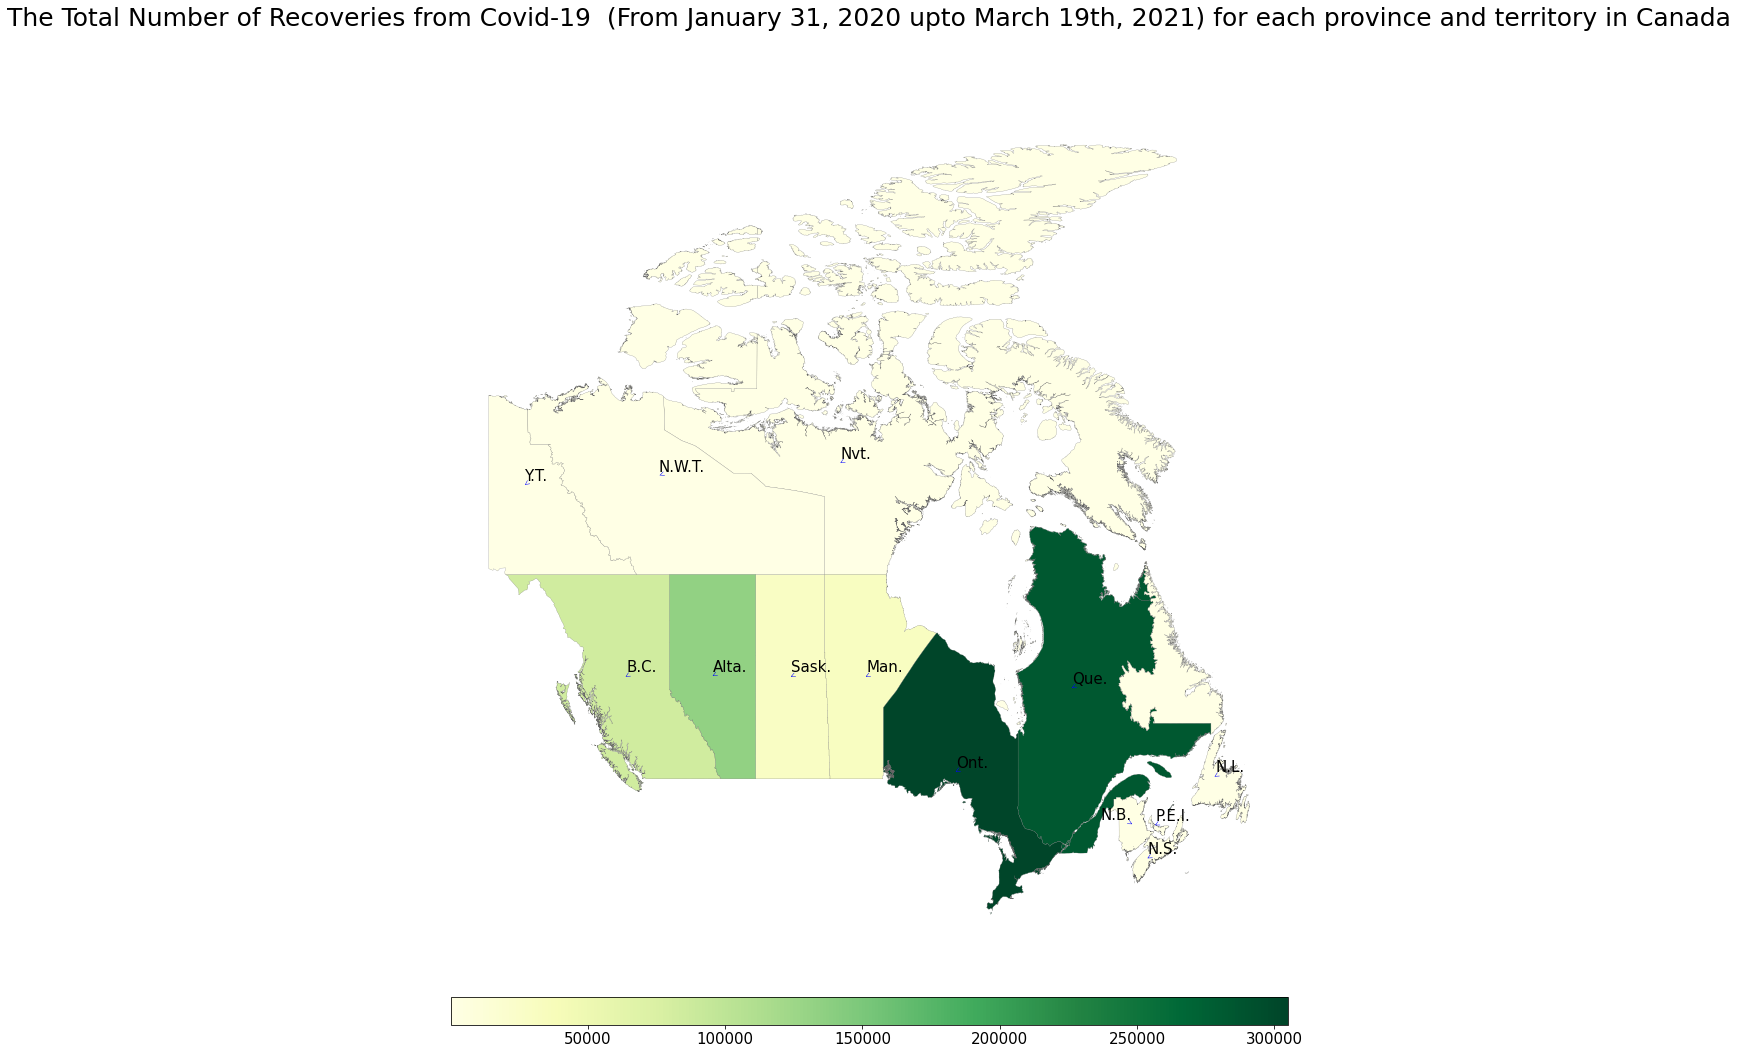

In [116]:
gf  = gpd.read_file("gpr_000b11a_e.zip")

data_march_2021 = df[df['date'].apply(lambda x:x.split()[0]) == "19-03-2021"]
data_march_2021
covid_canada_data = gf.merge(data_march_2021,how='left',left_on='PRENAME', right_on='prname')
covid_canada_data.head()

covid_canada_data["center"] = covid_canada_data["geometry"].representative_point()
covid_canada_data_points = covid_canada_data.copy()
covid_canada_data_points.set_geometry("center", inplace = True)




ax = covid_canada_data.plot(column ="numrecover",cmap="YlGn",figsize=(15,20),edgecolor='0.4',linewidth=0.2 )



ax.set_axis_off()
vmin = covid_canada_data.numrecover.min()
vmax = covid_canada_data.numrecover.max()
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])


plt.title("The Total Number of Recoveries from Covid-19  (From January 31, 2020 upto March 19th, 2021) for each province and territory in Canada",color="black",fontsize=25,pad=80)
fmt = '%1.0f'
cbar = plt.colorbar(sm,orientation="horizontal", fraction=0.046, pad=0.04, aspect = 30,format = fmt)
cbar.ax.tick_params(labelsize=15)

texts = []

for x, y, label in zip(covid_canada_data_points.geometry.x, covid_canada_data_points.geometry.y, covid_canada_data_points["PREABBR"]):
    texts.append(plt.text(x, y, label, fontsize = 15,color="black"))




adjust_text(texts, arrowprops=dict(arrowstyle="->", color='blue', lw=0.5),
                                                save_steps=False)


plt.show()


### For the visualisation above I wanted to know, Which Region of Canada had the most number of Total Recoveries from COVID-19 from Jan 31, 2020 upto March 19, 2021 ? 

###  The above visualisation shows the total number of Recoveries from Covid-19 in each province and territory in Canada. We can see that the maximum number of Recoveries from Covid-19 were in Ontario around 300,000. From the  visualisation we can see that Quebec is the next province with most Recoveries a little less than 300,000. The number of Recoveries in Alberta were around 140,000. The number of recoveries in British Columbia were around 9000. The zones that were least affected are Yukon(YT), North West Territories(N.W.T), Nunavut(Nvt), Prince Edward Island, Nova Scotia and Newfoundland and Labrador.

In [117]:
import math
from functools import reduce
import datetime

# REPLACING NULL VALUES WITH 0'S
df = df.replace(np.nan, 0)
from matplotlib import pyplot as plt1

# ----------------------------DEBUGGING SUCCESSFUL --------------------------------
# print((df.numtoday).isnull().values.any())  
# print((df.numdeathstoday).isnull().values.any())  
# print((df.numrecoveredtoday).isnull().values.any())  


### For the visualisations ahead I needed to clean the data so, I replaced all the Null values with 0. The code above demonstrates that.

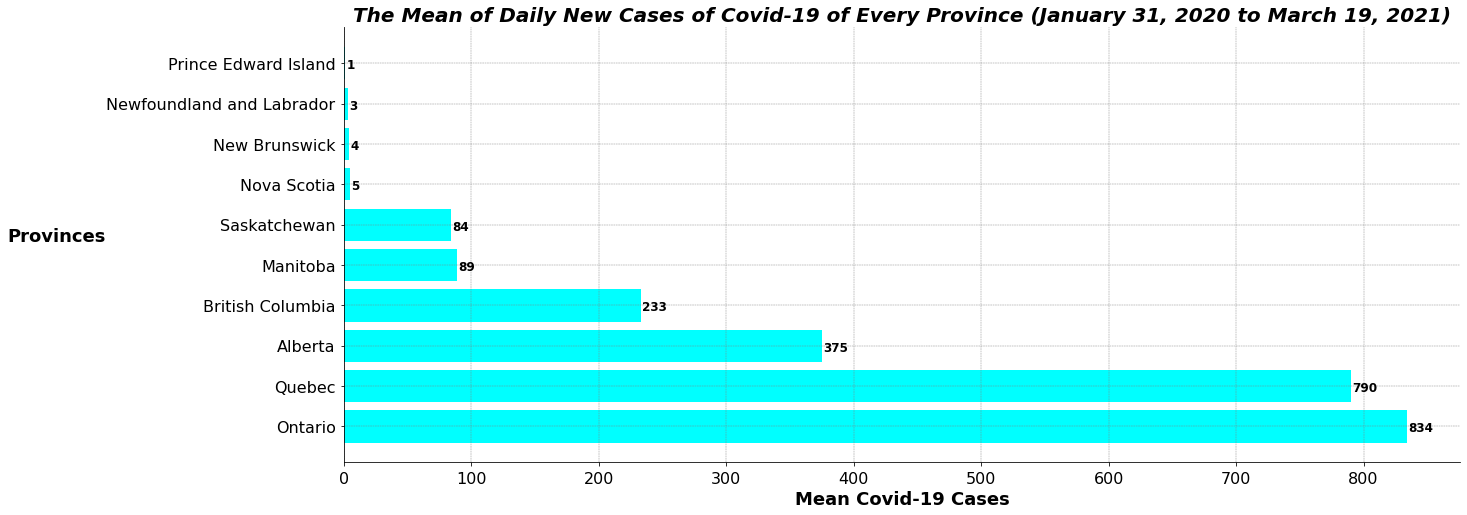

In [118]:
d = {'Ontario': [math.ceil(ontario_province_data.numtoday.mean())], 'Quebec': [math.ceil(quebec_province_data.numtoday.mean())],
     'Nova Scotia':[ math.ceil(nova_scotia_province_data.numtoday.mean())],'New Brunswick':[math.ceil(new_brunswick_province_data.numtoday.mean())],
     'Manitoba':[math.ceil(manitoba_province_data.numtoday.mean())],'British Columbia':[math.ceil(british_columbia_province_data.numtoday.mean())],
     'Prince Edward Island':[math.ceil(prince_edward_island_province_data.numtoday.mean())],'Saskatchewan':[math.ceil(saskatchewan_province_data.numtoday.mean())],
     'Alberta':[math.ceil(alberta_province_data.numtoday.mean())],"Newfoundland and Labrador":[math.ceil(newfoundland_and_labrador_province_data.numtoday.mean())]
}

mean_cases_province = pd.DataFrame(data=d)
mean_cases_province_sorted = mean_cases_province[[c for c in sorted(list(mean_cases_province.columns), key=mean_cases_province.iloc[-1].get, reverse=True)]]

fig, ax = plt1.subplots(figsize =(20, 8)) 
ax.barh(mean_cases_province_sorted.columns,mean_cases_province_sorted.values[0],color=['#00ffff'])
plt1.grid(True, linewidth=0.45, color='grey', linestyle='--')

fig.text(0.9, 0.15, "",fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7)
plt1.title("The Mean of Daily New Cases of Covid-19 of Every Province (January 31, 2020 to March 19, 2021)",fontsize=20,fontstyle='italic', fontweight='bold')

plt1.xlabel("Mean Covid-19 Cases",fontsize=18,fontweight='bold')
plt1.ylabel("Provinces",rotation="horizontal",labelpad=50,fontsize=18,fontweight='bold')
for i in ax.patches: 
    plt1.text(i.get_width()+0.9, i.get_y()+0.27,
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='black') 
for s in ['top', 'right']: 
    ax.spines[s].set_visible(False) 

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)
plt1.tick_params(labelsize=16)
plt1.show()







### For the visualisation above I wanted to know, How many New Covid-19 cases were reported daily in every province from January 31,2020 to March 19,2021 ? 

Therefore I calculated the mean of Daily new cases for each province which would give me a close approximation of new cases found daily for each province from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Ontario had maximum of 834 cases reported daily with the next high being Quebec where daily cases were around 790. Alberta and British Columbia had 375 and 233 daily new cases of covid-19 respectively. With the least being  in Nova Scotia 5, New Brunswick 4, Newfoundland and Labrador 3 and  Prince Edward Island 1 case.


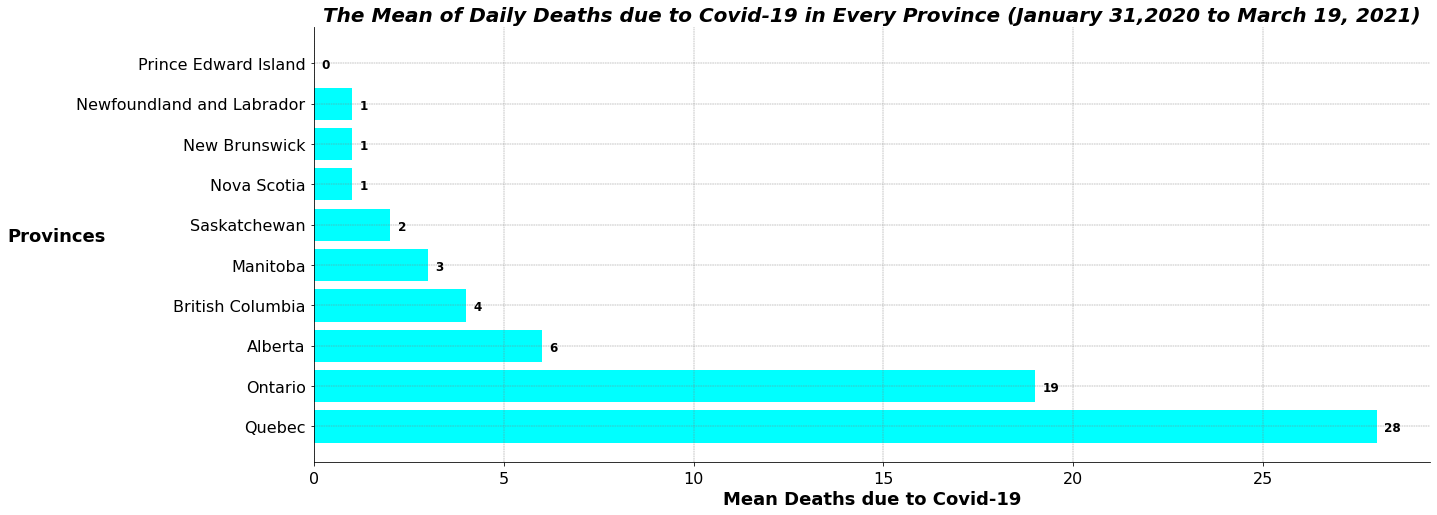

In [120]:
d = {'Ontario': [math.ceil(ontario_province_data.numdeathstoday.mean())], 'Quebec': [math.ceil(quebec_province_data.numdeathstoday.mean())],
     'Nova Scotia':[ math.ceil(nova_scotia_province_data.numdeathstoday.mean())],'New Brunswick':[math.ceil(new_brunswick_province_data.numdeathstoday.mean())],
     'Manitoba':[math.ceil(manitoba_province_data.numdeathstoday.mean())],'British Columbia':[math.ceil(british_columbia_province_data.numdeathstoday.mean())],
     'Prince Edward Island':[math.ceil(prince_edward_island_province_data.numdeathstoday.mean())],'Saskatchewan':[math.ceil(saskatchewan_province_data.numdeathstoday.mean())],
     'Alberta':[math.ceil(alberta_province_data.numdeathstoday.mean())],"Newfoundland and Labrador":[math.ceil(newfoundland_and_labrador_province_data.numdeathstoday.mean())]
}

mean_cases_province = pd.DataFrame(data=d)
mean_cases_province_sorted = mean_cases_province[[c for c in sorted(list(mean_cases_province.columns), key=mean_cases_province.iloc[-1].get, reverse=True)]]

fig, ax = plt1.subplots(figsize =(20, 8)) 
ax.barh(mean_cases_province_sorted.columns,mean_cases_province_sorted.values[0],color=['#00ffff'])



fig.text(0.9, 0.15, "",fontsize = 12, 
         color ='white', ha ='right', va ='bottom', 
         alpha = 0.7)
plt1.title("The Mean of Daily Deaths due to Covid-19 in Every Province (January 31,2020 to March 19, 2021)",fontsize=20,fontstyle='italic', fontweight='bold')

plt1.xlabel("Mean Deaths due to Covid-19",fontsize=18,fontweight='bold')
plt1.ylabel("Provinces",fontsize=18,fontweight='bold',rotation="horizontal",labelpad=20,color="black")
for i in ax.patches: 
    plt1.text(i.get_width()+0.2, i.get_y()+0.27,
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='black') 
for s in ['top', 'right']: 
    ax.spines[s].set_visible(False) 

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)
plt1.tick_params(labelsize=16)
plt1.grid(True, linewidth=0.45, color='grey', linestyle='--')

plt1.show()




### For the visualisation above I wanted to know, How many Daily Deaths due to Covid-19 were reported in every province from January 31,2020 to March 19,2021 ? 

Therefore I calculated the mean of Daily deaths for each province which would give me a close approximation of deaths reported daily for each province from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Quebec had maximum of 28 deaths reported daily with the next high being Ontario where daily deaths were around 19. Alberta and British Columbia had 6 and 4 daily deaths due to covid-19 respectively. With the least being  in Nova Scotia 1, New Brunswick 1, Newfoundland and Labrador 1, Manitoba 3 and Saskatchewan 2.


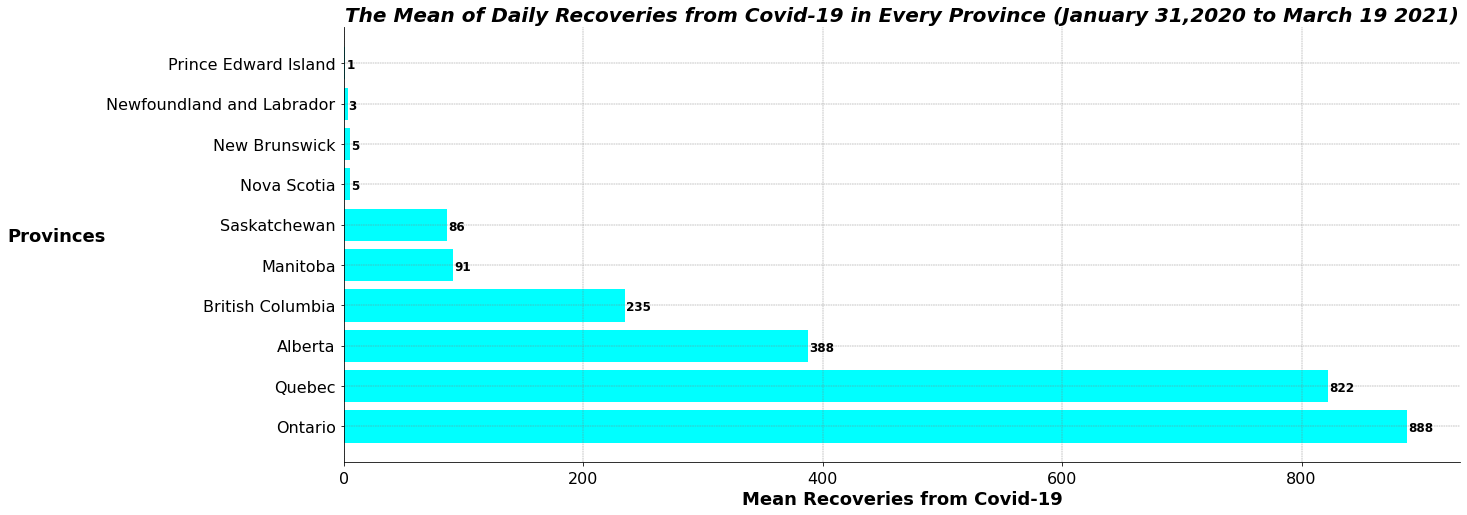

In [121]:
d = {'Ontario': [math.ceil(ontario_province_data.numrecoveredtoday.mean())], 'Quebec': [math.ceil(quebec_province_data.numrecoveredtoday.mean())],
     'Nova Scotia':[ math.ceil(nova_scotia_province_data.numrecoveredtoday.mean())],'New Brunswick':[math.ceil(new_brunswick_province_data.numrecoveredtoday.mean())],
     'Manitoba':[math.ceil(manitoba_province_data.numrecoveredtoday.mean())],'British Columbia':[math.ceil(british_columbia_province_data.numrecoveredtoday.mean())],
     'Prince Edward Island':[math.ceil(prince_edward_island_province_data.numrecoveredtoday.mean())],'Saskatchewan':[math.ceil(saskatchewan_province_data.numrecoveredtoday.mean())],
     'Alberta':[math.ceil(alberta_province_data.numrecoveredtoday.mean())],"Newfoundland and Labrador":[math.ceil(newfoundland_and_labrador_province_data.numrecoveredtoday.mean())]
}

mean_cases_province = pd.DataFrame(data=d)
mean_cases_province_sorted = mean_cases_province[[c for c in sorted(list(mean_cases_province.columns), key=mean_cases_province.iloc[-1].get, reverse=True)]]

fig, ax = plt1.subplots(figsize =(20, 8)) 
ax.barh(mean_cases_province_sorted.columns,mean_cases_province_sorted.values[0],color=['#00ffff'])


fig.text(0.9, 0.15, "",fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7)
plt1.title("The Mean of Daily Recoveries from Covid-19 in Every Province (January 31,2020 to March 19 2021)",fontsize=20,fontstyle='italic', fontweight='bold')

plt1.xlabel("Mean Recoveries from Covid-19",fontsize=18,fontweight='bold')
plt1.ylabel("Provinces",fontsize=18,fontweight='bold',rotation="horizontal",labelpad=50)
for i in ax.patches: 
    plt1.text(i.get_width()+0.9, i.get_y()+0.27,
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='black') 
for s in ['top', 'right']: 
    ax.spines[s].set_visible(False) 
plt1.grid(True, linewidth=0.45, color='grey', linestyle='--')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)
plt1.tick_params(labelsize=16)
plt1.show()


### For the visualisation above I wanted to know, How many Recoveries from Covid-19 were reported daily in every province from January 31, 2020 to March 19, 2021? 

Therefore, I calculated the mean of Daily recoveries for each province which would give me a close approximation of recoveries reported daily from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Ontario had maximum of 888 recoveries reported daily, with the next high being Quebec where daily recoveries were around 822. Alberta and British Columbia had 388 and 235 daily recoveries from covid-19 respectively. With Manitoba being 91 daily recoveries and 86 in Saskatchewan. With 5 daily recoveries in Nova Scotia and New Brunswick. The number of daily recoveries for Newfoundland and Labrador being 3 and 1 being in Prince Edward Island.



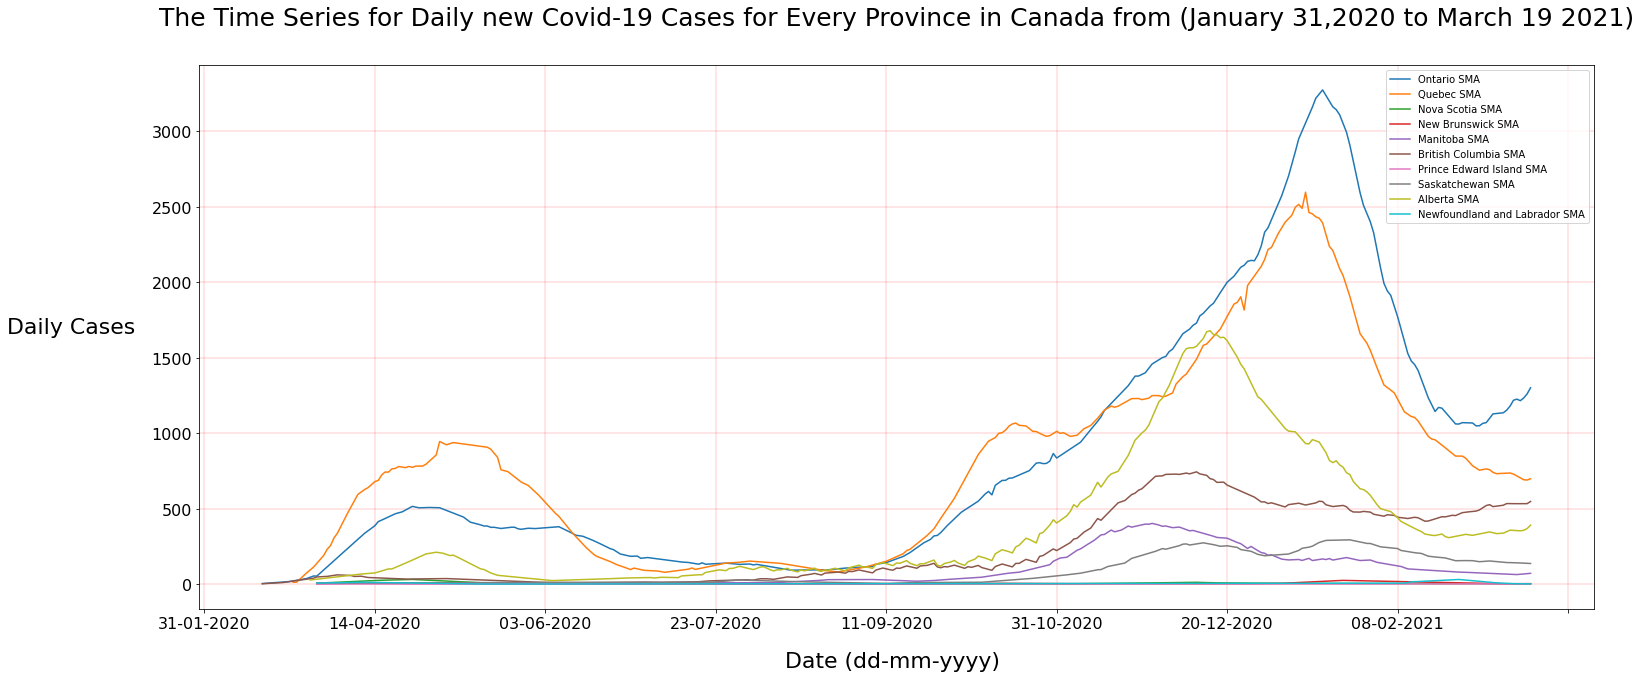

In [122]:

ontario_province_data["Ontario SMA"] = ontario_province_data.numtoday.rolling(window=18).mean()
quebec_province_data["Quebec SMA"] = quebec_province_data.numtoday.rolling(window=18).mean()
nova_scotia_province_data["Nova Scotia SMA"] = nova_scotia_province_data.numtoday.rolling(window=18).mean()
new_brunswick_province_data["New Brunswick SMA"] = new_brunswick_province_data.numtoday.rolling(window=18).mean()
manitoba_province_data["Manitoba SMA"] = manitoba_province_data.numtoday.rolling(window=18).mean()
british_columbia_province_data["British Columbia SMA"] = british_columbia_province_data.numtoday.rolling(window=18).mean()
prince_edward_island_province_data["Prince Edward Island SMA"] = prince_edward_island_province_data.numtoday.rolling(window=18).mean()
saskatchewan_province_data["Saskatchewan SMA"] = saskatchewan_province_data.numtoday.rolling(window=18).mean()
alberta_province_data["Alberta SMA"] = alberta_province_data.numtoday.rolling(window=18).mean()
newfoundland_and_labrador_province_data["Newfoundland and Labrador SMA"] = newfoundland_and_labrador_province_data.numtoday.rolling(window=18).mean()

data_frames = [ontario_province_data, quebec_province_data, nova_scotia_province_data,new_brunswick_province_data,manitoba_province_data,british_columbia_province_data,prince_edward_island_province_data,
               saskatchewan_province_data,alberta_province_data,newfoundland_and_labrador_province_data]



df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)


df_merged.plot(x="date",y=["Ontario SMA","Quebec SMA","Nova Scotia SMA","New Brunswick SMA","Manitoba SMA","British Columbia SMA","Prince Edward Island SMA","Saskatchewan SMA","Alberta SMA","Newfoundland and Labrador SMA"],figsize=(25,10),fontsize=16)
plt.style.use("fast")
plt.title("The Time Series for Daily new Covid-19 Cases for Every Province in Canada from (January 31,2020 to March 19 2021)",size=25,pad=40)

plt.xlabel("Date (dd-mm-yyyy) ",size=22,labelpad=20)
plt.ylabel("Daily Cases",size=22,rotation="horizontal",labelpad=80)
plt.grid(color='r', linestyle='-', linewidth=0.2)



plt.show()





### For the visualisation above I wanted to know, What was the trend of Daily new Covid-19 cases over Time from January 31, 2020 to March 19, 2021 ? 


For this visualisation I calculated the Simple Moving Average to smooth the Time Series that displayed the trend over Time. Therefore I calculated the Simple Moving Average of Daily new Covid-19 cases for each province from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Quebec saw a spike up in the new cases from April(2020) to June(2020) followed by a decline till September(2020) and continued rising from September(2020) to a highest peak in January (2021) followed by a smooth decline in February(2021) continuing to March(2021) as well. 

Ontario also saw a spike up from April(2020) to June(2020) and then started climbing up from September(2020) to January(2021) attaining the highest peak out of all the provinces.

Alberta also followed a same pattern with a little spike up  from April(2020) to June(2020) and then continous high up from September(2020) to December(2020) and then falling back in 2021.



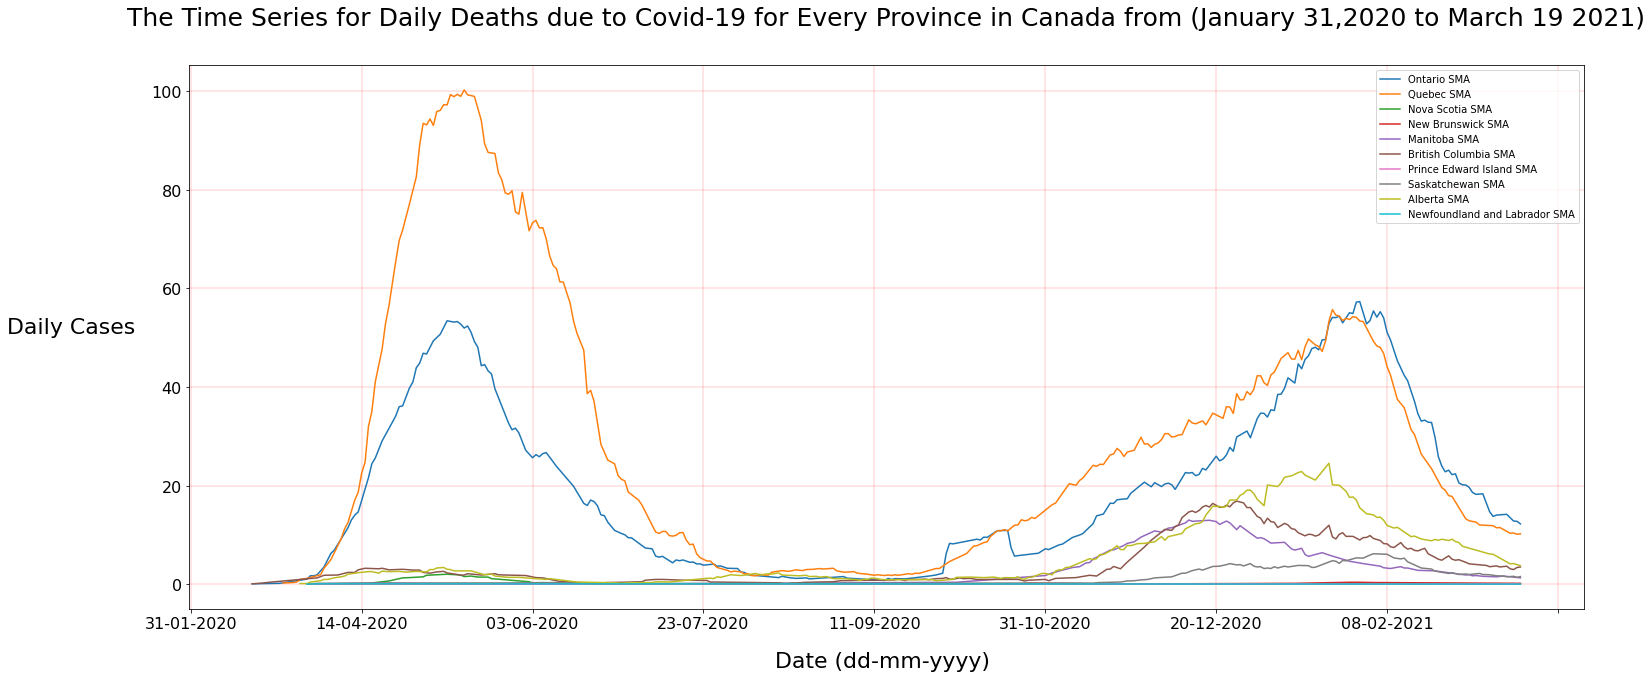

In [123]:

ontario_province_data["Ontario SMA"] = ontario_province_data.numdeathstoday.rolling(window=19).mean()
quebec_province_data["Quebec SMA"] = quebec_province_data.numdeathstoday.rolling(window=19).mean()
nova_scotia_province_data["Nova Scotia SMA"] = nova_scotia_province_data.numdeathstoday.rolling(window=19).mean()
new_brunswick_province_data["New Brunswick SMA"] = new_brunswick_province_data.numdeathstoday.rolling(window=19).mean()
manitoba_province_data["Manitoba SMA"] = manitoba_province_data.numdeathstoday.rolling(window=19).mean()
british_columbia_province_data["British Columbia SMA"] = british_columbia_province_data.numdeathstoday.rolling(window=19).mean()
prince_edward_island_province_data["Prince Edward Island SMA"] = prince_edward_island_province_data.numdeathstoday.rolling(window=19).mean()
saskatchewan_province_data["Saskatchewan SMA"] = saskatchewan_province_data.numdeathstoday.rolling(window=19).mean()
alberta_province_data["Alberta SMA"] = alberta_province_data.numdeathstoday.rolling(window=19).mean()
newfoundland_and_labrador_province_data["Newfoundland and Labrador SMA"] = newfoundland_and_labrador_province_data.numdeathstoday.rolling(window=19).mean()

data_frames = [ontario_province_data, quebec_province_data, nova_scotia_province_data,new_brunswick_province_data,manitoba_province_data,british_columbia_province_data,prince_edward_island_province_data,
               saskatchewan_province_data,alberta_province_data,newfoundland_and_labrador_province_data]



df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)


df_merged.plot(x="date",y=["Ontario SMA","Quebec SMA","Nova Scotia SMA","New Brunswick SMA","Manitoba SMA","British Columbia SMA","Prince Edward Island SMA","Saskatchewan SMA","Alberta SMA","Newfoundland and Labrador SMA"],figsize=(25,10),fontsize=16)
plt.style.use("fast")
plt.title("The Time Series for Daily Deaths due to Covid-19 for Every Province in Canada from (January 31,2020 to March 19 2021)",size=25,pad=40)

plt.xlabel("Date (dd-mm-yyyy) ",size=22,labelpad=20)
plt.ylabel("Daily Cases",size=22,rotation="horizontal",labelpad=80)
plt.grid(color='r', linestyle='-', linewidth=0.2)

plt.show()





### For the visualisation above I wanted to know, What was the trend of Daily Deaths due to Covid-19 cases over Time from January 31, 2020 to March 19, 2021 ? 

For this visualisation I calculated the Simple Moving Average to smooth the Time Series that displayed the trend over Time. Therefore I calculated the Simple Moving Average of Daily Deaths due to Covid-19 cases for each province from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Quebec saw a spike up in the deaths from April(2020) to June(2020) followed by a decline till September(2020) and continued rising from September(2020) to a peak in January (2021) followed by a smooth decline in February(2021) continuing to March(2021) as well. 

Ontario also saw a spike up in the deathes from April(2020) to June(2021) reporting the peak in January(2021) and then started declining from February(2021) to March(2021).



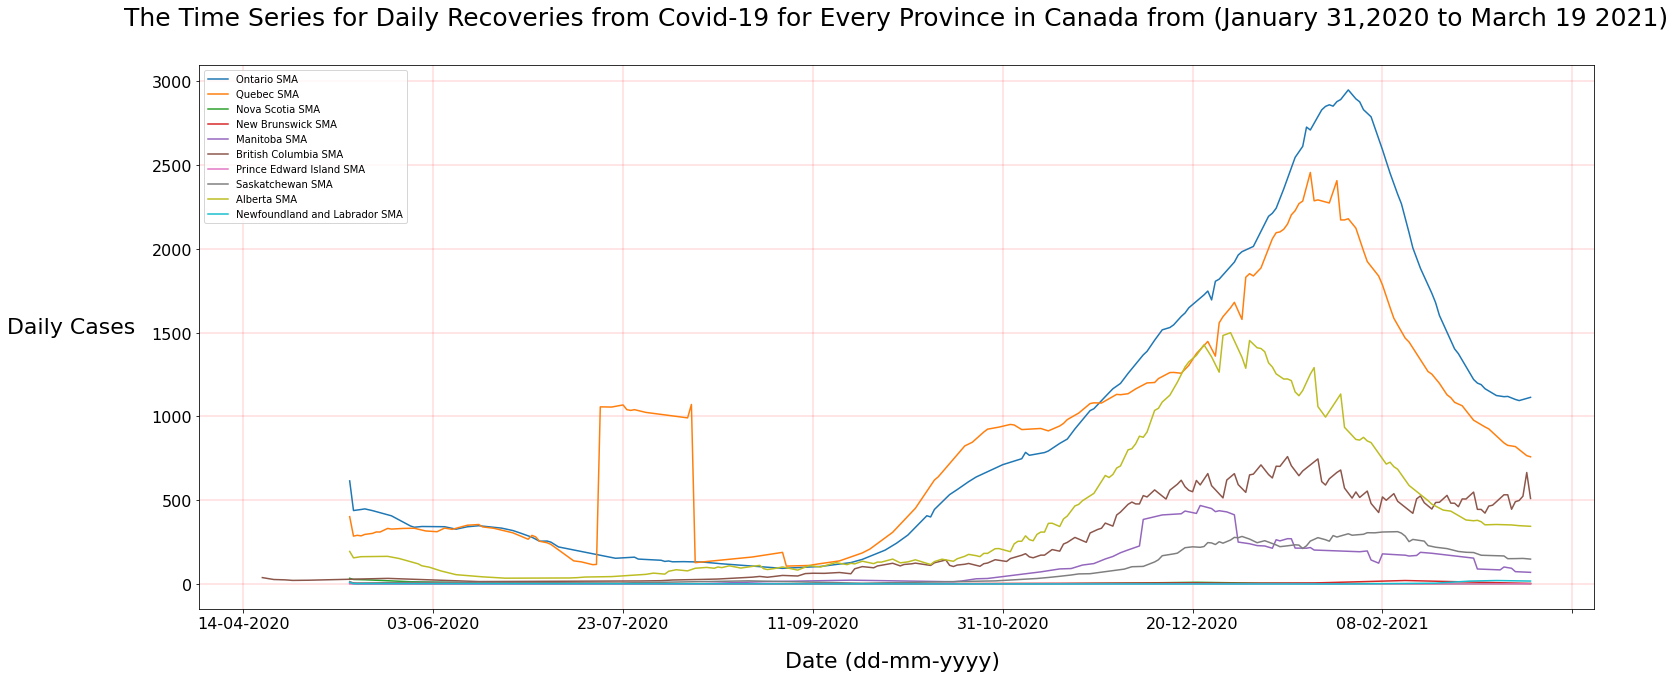

In [125]:

ontario_province_data["Ontario SMA"] = ontario_province_data.numrecoveredtoday.rolling(window=25).mean()
quebec_province_data["Quebec SMA"] = quebec_province_data.numrecoveredtoday.rolling(window=25).mean()
nova_scotia_province_data["Nova Scotia SMA"] = nova_scotia_province_data.numrecoveredtoday.rolling(window=25).mean()
new_brunswick_province_data["New Brunswick SMA"] = new_brunswick_province_data.numrecoveredtoday.rolling(window=25).mean()
manitoba_province_data["Manitoba SMA"] = manitoba_province_data.numrecoveredtoday.rolling(window=25).mean()
british_columbia_province_data["British Columbia SMA"] = british_columbia_province_data.numrecoveredtoday.rolling(window=25).mean()
prince_edward_island_province_data["Prince Edward Island SMA"] = prince_edward_island_province_data.numrecoveredtoday.rolling(window=25).mean()
saskatchewan_province_data["Saskatchewan SMA"] = saskatchewan_province_data.numrecoveredtoday.rolling(window=25).mean()
alberta_province_data["Alberta SMA"] = alberta_province_data.numrecoveredtoday.rolling(window=25).mean()
newfoundland_and_labrador_province_data["Newfoundland and Labrador SMA"] = newfoundland_and_labrador_province_data.numrecoveredtoday.rolling(window=25).mean()

data_frames = [ontario_province_data, quebec_province_data, nova_scotia_province_data,new_brunswick_province_data,manitoba_province_data,british_columbia_province_data,prince_edward_island_province_data,
               saskatchewan_province_data,alberta_province_data,newfoundland_and_labrador_province_data]



df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)


df_merged.plot(x="date",y=["Ontario SMA","Quebec SMA","Nova Scotia SMA","New Brunswick SMA","Manitoba SMA","British Columbia SMA","Prince Edward Island SMA","Saskatchewan SMA","Alberta SMA","Newfoundland and Labrador SMA"],figsize=(25,10),fontsize=16)
plt.style.use("fast")
plt.title("The Time Series for Daily Recoveries from Covid-19 for Every Province in Canada from (January 31,2020 to March 19 2021)",size=25,pad=40)

plt.xlabel("Date (dd-mm-yyyy) ",size=22,labelpad=20)
plt.ylabel("Daily Cases",size=22,rotation="horizontal",labelpad=80)
plt.grid(color='r', linestyle='-', linewidth=0.2)

plt.show()





### For the visualisation above I wanted to know, What was the trend of Daily Recoveries from Covid-19 cases over Time from January 31, 2020 to March 19, 2021 ? 

For this visualisation I calculated the Simple Moving Average to smooth the Time Series that displayedd the trend over Time. Therefore I calculated the Simple Moving Average of Daily Recoveries from Covid-19 cases for each province from January 31, 2020 to March 19, 2021. From the visualisation above we can observe that Quebec saw a spike up in the recoveries from July(2020) to August(2020) followed by a decline till September(2020) and continued rising from September(2020) to a highest peak in January (2021) followed by a smooth decline in February(2021) continuing to March(2021) as well. 

Ontario also saw a spike up in the recoveries from September(2020) to January(2021) reporting the highest peak in January(2021) and then started declining from February(2021) to March(2021).

